## Hierachical Models Assignment

In [65]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
from matplotlib import pyplot

# set figure size
pyplot.rcParams["figure.figsize"] = (15,9)

In [3]:
# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df.columns = ["CustomerID", "Gender", "Age", "Annual Income", "Spending Score"]
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Objective: 

- Fit Hierarchical clustering, 
- find optimal number of clusters via dendrogram 
- and plot clusters. 

Again, to simplify plotting in 2-D, we can create clustering model based on the last two columns of the dataset only.

In [36]:
df1 = df[["Annual Income", "Spending Score"]]
df1.head(2)

,Annual Income,Spending Score
0,15,39
1,15,81


In [51]:
data = df1.to_numpy()
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

* define function plot_dendogram

In [39]:
help(sch.dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

In [40]:
help(sch.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [38]:
dir(sch)

['ClusterNode',
 'ClusterWarning',
 'DisjointSet',
 '_EUCLIDEAN_METHODS',
 '_LINKAGE_METHODS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_append_contraction_marks',
 '_append_contraction_marks_sub',
 '_append_nonsingleton_leaf_node',
 '_append_singleton_leaf_node',
 '_check_hierarchy_not_all_clusters_used',
 '_check_hierarchy_uses_cluster_before_formed',
 '_check_hierarchy_uses_cluster_more_than_once',
 '_cnode_bare',
 '_cnode_type',
 '_convert_to_bool',
 '_convert_to_double',
 '_copy_array_if_base_present',
 '_copy_arrays_if_base_present',
 '_dendrogram_calculate_info',
 '_drotation',
 '_drotationsortedkeys',
 '_dtextsizes',
 '_dtextsortedkeys',
 '_get_leaves_color_list',
 '_get_tick_rotation',
 '_get_tick_text_size',
 '_hierarchy',
 '_link_line_colors',
 '_link_line_colors_default',
 '_optimal_leaf_ordering',
 '_order_cluster_tree',
 '_plot_dendrogram',
 '_randdm',
 '_remove_dups',
 '_warning',
 'av

In [44]:
def plot_dendrogram(X, method="ward"):
    dendrogram = sch.dendrogram(sch.linkage(X))
    pyplot.show()

* Plot dendrogram

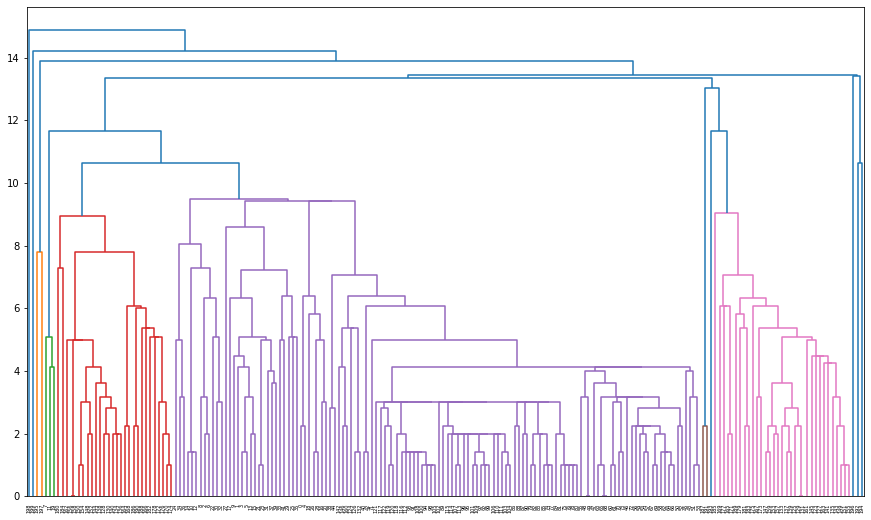

In [67]:
plot_dendrogram(data)

* Fit Hierarchical clustering with optimal number of clusters

In [62]:
ac = AgglomerativeClustering(n_clusters=5)
prediction = ac.fit_predict(df1)
prediction

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

* define function plot_clusters

In [63]:
def plot_clusters(data, prediction):
    for cluster in set(prediction):
        x = data[prediction == cluster,0]
        y = data[prediction == cluster,1]
        pyplot.scatter(x, y)
    pyplot.show()

* Plot HC clusters

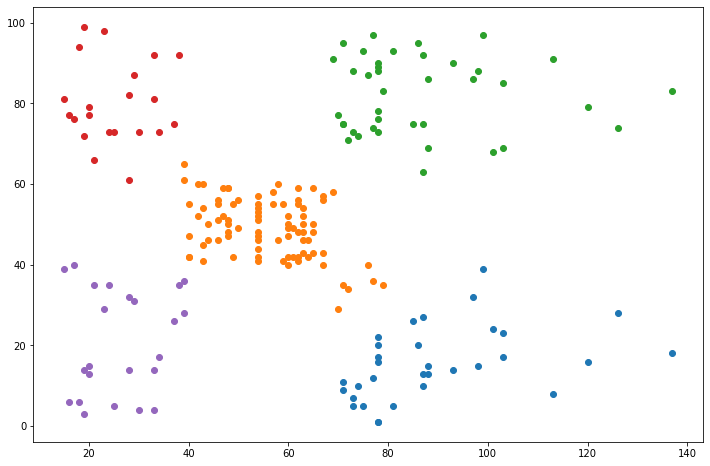

In [64]:
plot_clusters(data, prediction)